(First-order linear PDEs)=
# First-order linear PDEs

In this section we will consider first-order linear PDEs for an unknown function $u$ of two variables:

$$ a(x,y)u_x + b(x,y)u_y = f(x, y, u) $$

The method which we will use to find the solution of such PDEs is called the method of characteristics. This is a very useful method with an intuitive geometric interpretation and it can be applied to even more complicated PDEs, which we will not consider here.

(pde1st_characteristics)=
## Method of characteristics

```{index} Method of characteristics
```

The main idea behind this method is a popular one: we want to reduce the PDE to an ODE, which are in general much easier to solve. We do that by analysing the PDE along specially chosen curves in $xy$ plane, which we call characteristic curves or just **characteristics**. We parameterise them by the parameter $s$, such that $x = x(s), y = y(s)$ and we choose them such that the following system of ODEs is satisfied:

$$ \frac{dx}{ds} = a, \quad \frac{dy}{ds} = b, \quad \frac{du}{ds} = f$$

Then after using the chain rule and substituting this, we have

$$ \frac{du}{ds} = \frac{\partial u}{\partial x} \frac{dx}{ds} + \frac{\partial u}{\partial y} \frac{dy}{ds} = f(x(s), y(s), u(s)) $$

This simplifies our problem quite a bit, since we have reduced the PDE to an ODE. Let us now look at a few examples.

### Example: constant coefficients, homogeneous

Let us start with the simplest example, where $a$ and $b$ are constants and $f \equiv 0$:

$$ 2u_x + 3u_y = 0, \qquad u(x, 0) = \cos x $$

Setting

$$ \frac{dx}{ds} = 2, \quad \frac{dy}{ds} = 3$$

and using the chain rule we get

$$ \frac{du}{ds} = 2u_x + 3u_y = 0 $$

This means that the PDE along the characteristic line $(x(s), y(s))$ is a constant. We can write the parametrization invariant form of the above equations as

$$ ds = \frac{dx}{2} = \frac{dy}{3} $$

from which

$$ \frac{dx}{dy} = \frac{2}{3} $$

So the characteristics are given by $2y = 3x + c$, where $c$ is an integration constant which will determine which characteristic line we are on. Let us plot a couple of them.

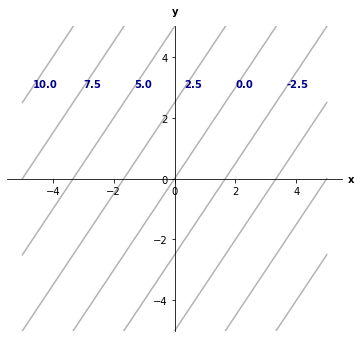

In [77]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 51)
c = np.linspace(-10, 10, 9)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for cc in c:
    ax.plot(x, 3/2 * x + cc, 'k-', alpha=0.3)
    
    if cc > -5:
        ax.text(2 - cc/1.5, 3, cc, c='darkblue', weight='bold')

ax.text(-0.1, 5.4, 'y', weight='bold')
ax.text(5.7, -0.1, 'x', weight='bold')
        
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-5, 5)
    
plt.show()

Here we plotted characteristics for different values of $c$, which are written in bold along characteristics.

All characteristics are parallel to each other, of course, and since $u$ is constant along each characteristic line, $u$ will only vary if we jump from one characteristic to another. Since $c$ marks which characteristic we are sitting on, $u$ will therefore be a function of $c$.

$$ u(x(y), y) = f(c) = f(-3x + 2y) $$

where $f$ is an arbitrary function of one variable.

Finally we need to use the auxiliary condition $u(x, 0) = \cos x$ to find the particular solution. For $y=0$:

$$ u(x, 0) = f(-3x) = \cos (x) $$

Let $w = -3x$. Then:

$$ f(w) = \cos (-w/3) $$.

Hence the solution is

$$ u(x, t) = f(-3x + 2y) = \cos(x - \frac{2}{3}y) $$

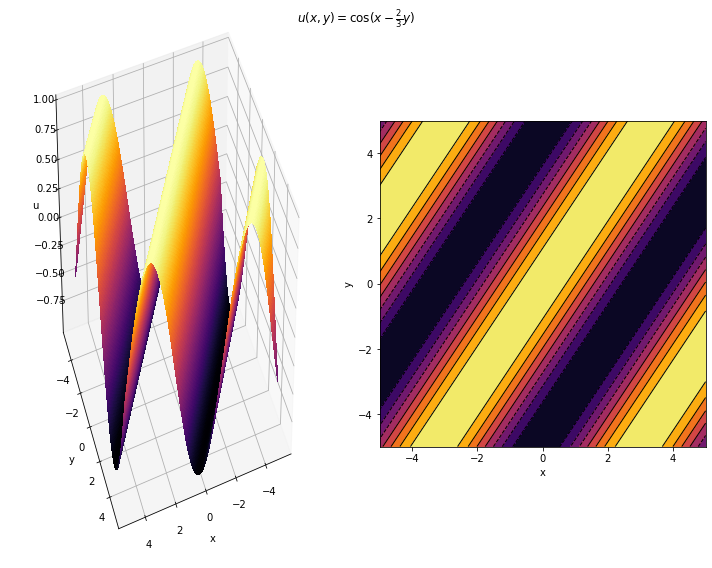

In [150]:
from mpl_toolkits.mplot3d import Axes3D


x = np.linspace(-5, 5, 201)
y = np.linspace(-5, 5, 201)
X, Y = np.meshgrid(x, y)

f = np.cos(X - 2/3 * Y)

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

ax1.plot_surface(X, Y, f, rstride=1, cstride=1, cmap='inferno', antialiased=False)
ax2.contourf(f, cmap='inferno', extent=[-5, 5, -5, 5])
ax2.contour(f, colors='k', extent=[-5, 5, -5, 5], linewidths=1.)

ax1.view_init(40, 70)
ax2.set_aspect('equal')

for ax in (ax1, ax2):
    ax.set_xlabel('x')
    ax.set_ylabel('y')
ax1.set_zlabel('u')
    
fig.suptitle(r'$u(x,y) = \cos (x - \frac{2}{3}y)$')

plt.tight_layout()
plt.show()

Notice that each of the contours is a characteristic, since $u$ is constant along a characteristic.

```{important}
A first-order linear PDE of the form

$$ au_x + bu_y = 0 $$

has a general solution of the form

$$ u(x, y) = f(bx - ay) $$

where $f$ is an arbitrary function of one variable.
```

## Example: general case

Let us now consider an inhomogeneous linear problem with variable coefficients.

$$ (x + y)u_x + y u_y = xyu $$

with the boundary condition $u(x,y) = e^{x^2/4} $ for $y = x$.